In [54]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect and Inspect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, extract

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Inspecting the database to retrieve columns names and check contents

In [10]:
# Inspecting the DB
inspector = inspect(engine)

In [11]:
# Inspecting the measurement table
columns = inspector.get_columns('measurement')
columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [12]:
# Getting the type of columns for name and type for measurement

for col in columns:
    print(col['name'], col['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
# Checking values for Measurement class
session.query(Measurement.id, Measurement.station, Measurement.prcp, Measurement.tobs).limit(5).all()

[(1, 'USC00519397', 0.08, 65.0),
 (2, 'USC00519397', 0.0, 63.0),
 (3, 'USC00519397', 0.0, 74.0),
 (4, 'USC00519397', 0.0, 76.0),
 (5, 'USC00519397', None, 73.0)]

In [14]:
# Inspecting the station table
columns1 = inspector.get_columns('station')
columns1

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [15]:
# Getting the type of columns for name and type for station

for col in columns1:
    print(col['name'], col['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [16]:
# Checking values for Station class
session.query(Station.id, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).\
    limit(5).all()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3,
  'USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

# Exploratory Climate Analysis

In [17]:
# Determine the oldest

oldest_date = session.query(Measurement.date).order_by(Measurement.date.asc()).first()
oldest_date[0]

'2010-01-01'

Design a query to retrieve the last 12 months of precipitation data and plot the results

In [18]:
# Calculate the date 1 year ago from the last data point in the database

last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date[0]

# Converting last date to date format
last_date = dt.datetime.strptime(str(last_date[0]),'%Y-%m-%d')
last_date

datetime.datetime(2017, 8, 23, 0, 0)

In [19]:
# Perform a query to retrieve the data and precipitation scores

# get date one year before the last date

previous_year_date = last_date - dt.timedelta(days = 365)
previous_year_date

datetime.datetime(2016, 8, 23, 0, 0)

In [20]:
#Filtering for data from the previous year date
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= previous_year_date).all()
precipitation

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [21]:
# Save the query results as a Pandas DataFrame and set the index to the date column

precipitation_df = pd.DataFrame(precipitation, columns=['Date', "Precipitation"])
precipitation_df.head()

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


In [22]:
# Sort the dataframe by date
sorted_df = precipitation_df.sort_values(by=['Date'])

# Replacing NaN values with 0's
sorted_df['Precipitation'] = sorted_df['Precipitation'].fillna(0)

# Setting date as index
sorted_df.set_index('Date', inplace = True)
sorted_df.head()

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,0.00
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15


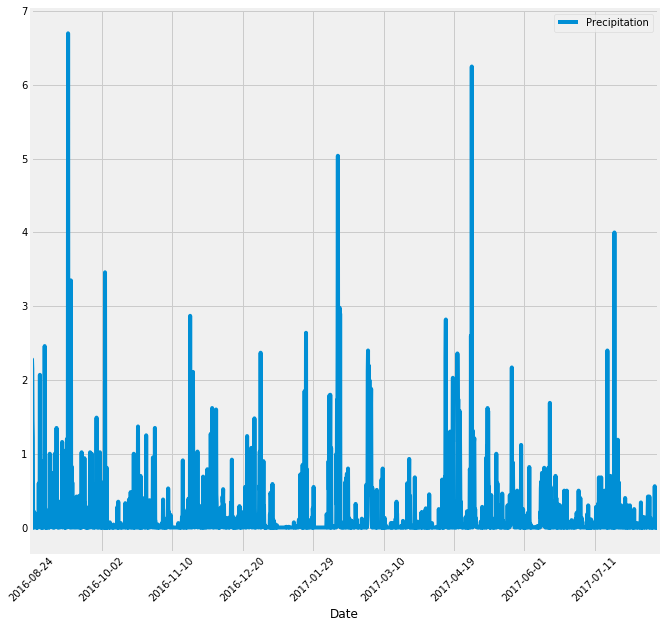

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data
sorted_df.plot(figsize=(10,10),rot=45)


In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data

sorted_df.describe()


,Precipitation
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


Slight difference with table below is due to the fact that I set up the NaN values to 0

![describe](Images/describe.png)

In [25]:
# Design a query to show how many stations are available in this dataset?

session.query(func.count(Station.station)).all()

[(9)]

In [26]:
session.query(Station.station).distinct().all()

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [27]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by (func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [29]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_busy_station= session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').filter(Measurement.date >= previous_year_date ).\
    all()

In [30]:
# Save the query results as a Pandas DataFrame and set the index to the date column

temp_df = pd.DataFrame(temp_busy_station, columns=['tobs'])
temp_df.head()

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0


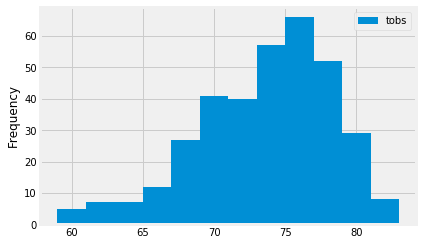

In [31]:
# Use Pandas Plotting with Matplotlib to plot the data
temp_df.plot.hist(bins=12)

![precipitation](Images/station-histogram.png)

In [32]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
results_1 = calc_temps('2012-02-28', '2012-03-05')
results_1

[(62.0, 69.57142857142857, 74.0)]

In [33]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

date_1 = '2011-02-28'
date_2 = '2011-03-05'
date_3 = '2012-02-28'
date_4 = '2013-03-05'

# function usage example
results_2 = calc_temps(date_1, date_2)
results_2

[(61.0, 69.75510204081633, 75.0)]

In [34]:
chart_data1 = pd.DataFrame(results_1, columns=['Tmin', 'Tavg', 'Tmax'])
chart_data1['yerr'] = chart_data1['Tmax']- chart_data1['Tmin']
chart_data = pd.DataFrame(results_2, columns=['Tmin', 'Tavg', 'Tmax'])
chart_data['yerr'] = chart_data['Tmax']- chart_data['Tmin']

chart_data = chart_data.append(chart_data1)
chart_data = chart_data.reset_index(drop=True)

# Add column with Name Marks
chart_data['Time'] = ['Date1', 'Date2']
chart_data

,Tmin,Tavg,Tmax,yerr,Time
0,61.0,69.755102,75.0,14.0,Date1
1,62.0,69.571429,74.0,12.0,Date2


Text(0, 0.5, 'Average Temperature (Farenheit)')

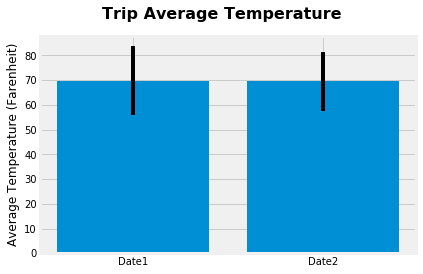

In [35]:
# Setting the bar char plot for the data for the two periods included

fig, ax1 = plt.subplots()

# Setting general plot header
fig.suptitle("Trip Average Temperature", fontsize=16, fontweight="bold")

ax1.bar(chart_data['Time'],chart_data['Tavg'], yerr=chart_data['yerr'])

# Setting axis labels
ax1.set_ylabel("Average Temperature (Farenheit)")

In [36]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

prec_trip= session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation,\
                        func.sum(Measurement.prcp)).filter(Station.station == Measurement.station).\
                        group_by(Measurement.station).\
                        filter(Measurement.date >= date_1).filter(Measurement.date <= date_4).\
                        order_by (func.count(Measurement.prcp).desc()).all()

prec_trip

[('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  123.95000000000006),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  56.28000000000003),
 ('USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9,
  21.21000000000001),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6,
  85.82999999999987),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  33.70000000000001),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  281.2899999999998),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  47.12000000000003),
 ('USC00517948',
  'PEARL CITY, HI US',
  21.3934,
  -157.9751,
  11.9,
  14.199999999999996),
 ('USC00518838',
  'UPPER WAHIAWA 874.3, HI US',
  21.4992,
  -158.0111,
  306.6,
  26.01999999999999)]

In [37]:
# Creating a dataframe with the results

precip_trip = pd.DataFrame(prec_trip, columns = ['Station', 'Name', 'Latitude', 'Longitude', 'Elevation', \
                                                 'Total Precipitation'])

# Sorting in desending order by precipitation
# Sorting did not come right in the query due to null values 

sorted_precip = precip_trip.sort_values(by=['Total Precipitation'],ascending=False)

sorted_precip

,Station,Name,Latitude,Longitude,Elevation,Total Precipitation
5,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,281.29
0,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,123.95
3,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,85.83
1,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,56.28
6,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,47.12
4,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,33.70
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,26.02
2,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,21.21
7,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,14.20


## Optional Challenge Assignment

Temperature Analysis # 1

In [38]:
# Create a query that will calculate the daily temperature average for the months of June
# for all stations

june = session.query(func.avg(Measurement.tobs)).filter(extract('month', Measurement.date) == '06').all()
june

[(74.94411764705882)]

In [50]:
# Creating a query to retrieve all temperature values for the month of June and savings it into dataframe

june_record = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == '06').all()
june_record

june_record = pd.DataFrame(june_record, columns=['Date','Temperature'])
june_temperatures = june_record.iloc[:, -1]

june_record.to_csv('june_temp.csv',index=False)


In [39]:
# Create a query that will calculate the daily temperature average for the months of June
# for all stations

december = session.query(func.avg(Measurement.tobs)).filter(extract('month', Measurement.date) == '12').all()
december

[(71.04152933421226)]

In [52]:
# Creating a query to retrieve all temperature values for the month of June and savings it into dataframe

december_record = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == '12').all()
december_record

december_record = pd.DataFrame(december_record, columns=['Date','Temperature'])
december_temperatures = december_record.iloc[:, -1]

december_record.to_csv('december_temp.csv',index=False)

In [56]:
# running the t-test

(t_stat, p) = stats.ttest_ind(june_temperatures, december_temperatures, equal_var=False)


In [74]:
# Report the data
print('----------------------------------------------------------')
print(f"The average temperature for the month of June is {june}")
print(f"The average temperature for the month of December is {december}")
print('----------------------------------------------------------')
print('')
print('----------------------------------------------------------')
print(f"p is {p}.")
print('----------------------------------------------------------')
print('')
print('----------------------------------------------------------')
if p < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")
print('')
print('----------------------------------------------------------')
print(f"The test should be unpaired")
print(f"There is not enough information on whether the temperature was taken at the same time and under the same conditions")

----------------------------------------------------------
The average temperature for the month of June is [(74.94411764705882,)]
The average temperature for the month of December is [(71.04152933421226,)]
----------------------------------------------------------

----------------------------------------------------------
p is 4.193529835915755e-187.
----------------------------------------------------------

----------------------------------------------------------
The difference in sample means is significant.

----------------------------------------------------------
The test should be unpaired
There is not enough information on whether the temperature was taken at the same time and under the same conditions
